## SEIRS Model - Fixed Iterative Sequential Data-Consistent Parameter Estimation 

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from pydci.examples import seirs
from pydci.log import enable_log, disable_log
from pydci.utils import get_l2_errs, set_seed
from pydci.log import logger
from pydci.utils import get_search_combinations
import pydci.consistent_bayes.OnlineSequential as os
import importlib
importlib.reload(seirs)


SEIRS_PARAM_MINS = 4 * [0]
SEIRS_STATE_MINS = 1e-10
SEIRS_STATE_MAXS = 1

# For periodic behavior
R_0 = 3

# Sample every week
SEIRS_SAMPLE_TS = 1

# Populations are all from 0-1 -> Fraction of population
SEIRS_NOISE = 0.001

# Parameters from bjornstad2020seirs paper
SEIRS_P1 = [
    R_0 / 14.0,  # beta transmission rate - R_0 / gamma -> R_0 > 0 for periodic behavior
    1.0
    / 7.0,  # sigma incubation rate i.e. rate at which exposed hosts become infected - 1 week
    1.0 / 14.0,  # gamma  mean recovery rate - 2 weeks
    1.0 / 365.0,  # xi - loss off imunity rate - 1 year
]

# (1) Policy Lockdown 1 month in: => Slower Transmission Rate(beta) - Time 75
SEIRS_P2 = [
    0.5 * R_0 / 14.0,  # transmission rate halved
    1.0 / 7.0,  # sigm
    1.0 / 14.0,
    1.0 / 365.0,
]
# (2) Virus Mutation 1 year in: => Faster Incubation Rate (sigma) - Time 150
SEIRS_P3 = [
    1.2 * R_0 / 14.0,  # transmission rate increased -> Faster transmitting virus
    1.0 / 3.5,  # Incubation rate halved -> Exposed hosts become infected quicker
    1.0 / 14.0,
    1.0 / 365.0,
]

SEIRS_X0 = [
    0.98,  # susceptible
    0.010,  # exposed
    0.010,  # infected
    0,  # recovered
]

# enable_log(level='DEBUG')
n_samples = 1000
total_time = 1 * 365.25
param_shifts = {0: SEIRS_P1, 25: SEIRS_P2, 150: SEIRS_P3}

## Problem Set-Up

<Axes: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

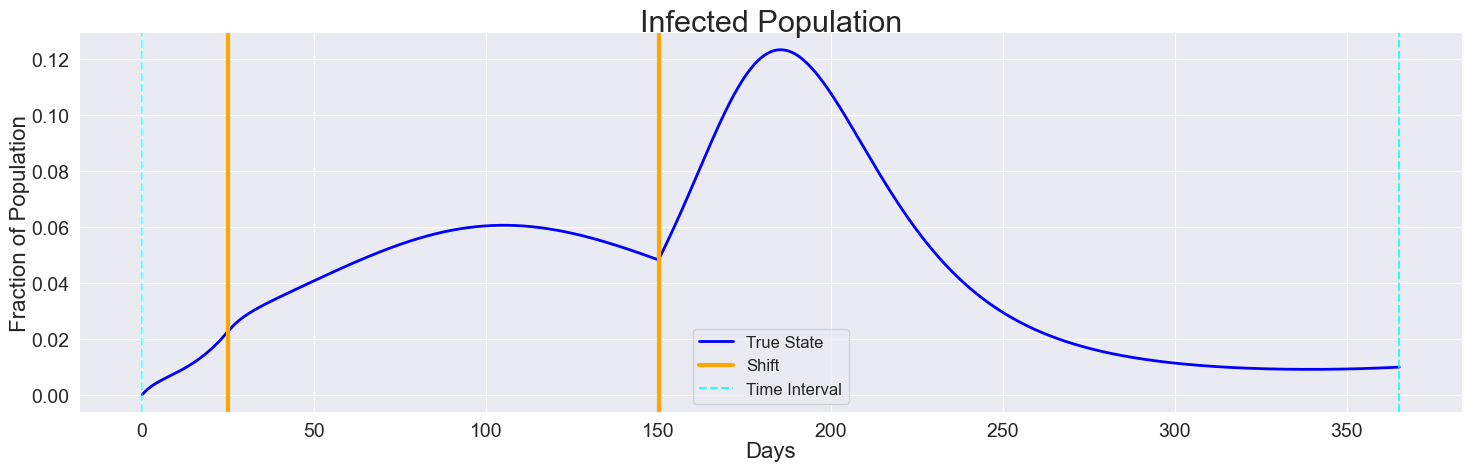

In [5]:
full_sr = seirs.SEIRSModel(
    lam_true=SEIRS_P1,
    param_shifts=param_shifts,
    measurement_noise=SEIRS_NOISE,
    sample_ts=SEIRS_SAMPLE_TS,
    state_mins=SEIRS_STATE_MINS,
    state_maxs=SEIRS_STATE_MAXS,
)
# pi_in, samples = full_sr.get_uniform_initial_samples(num_samples=1, scale=0.1)
res = full_sr.get_data(t0=0, tf=total_time)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
full_sr.plot_infected(plot_samples=False, plot_measurements=False, ax=ax)

# Iterations - Fixed weekly chunks of data

- If problem has not been initialized (no self.probs[] array), then the problem
is initialized with a uniform distribution over the parameter space around the
true value, with a scale of `diff` controlling the size of the uniform distribution
around the true value we search for, and hence the problem difficulty.
- Solve inverse problem for `num_its` consuming `time_step` data at each iteration.
- At each iteration, a set of possible sovle parameters will be searched for, varying:
    - number of PCA components, 
    - data points.
    - number of splits to use on data splits.
- The best solution will be determined by the `best_method` argument.

In [28]:
# disable_log()
enable_log(level="INFO", file="test.log")
set_seed(2023)
sr = seirs.SEIRSModel(
    lam_true=SEIRS_P1,
    param_shifts=param_shifts,
    measurement_noise=SEIRS_NOISE,
    sample_ts=SEIRS_SAMPLE_TS,
    state_mins=SEIRS_STATE_MINS,
    state_maxs=SEIRS_STATE_MAXS,
)

In [29]:
from pydci.log import logger
from pydci.utils import get_search_combinations
import pydci.consistent_bayes.OnlineSequential as os
import importlib

importlib.reload(os)
prob = os.OnlineSequential(
    sr,
    time_step=7,
)
disable_log()
# enable_log(level='DEBUG', filter='pydci.consistent_bayes.OnlineSequential')

<loguru.logger handlers=[(id=2, level=20, sink='test.log')]>

## First Iteration
Note how reset_samples = True 

In [30]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=True,
)

<Axes: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

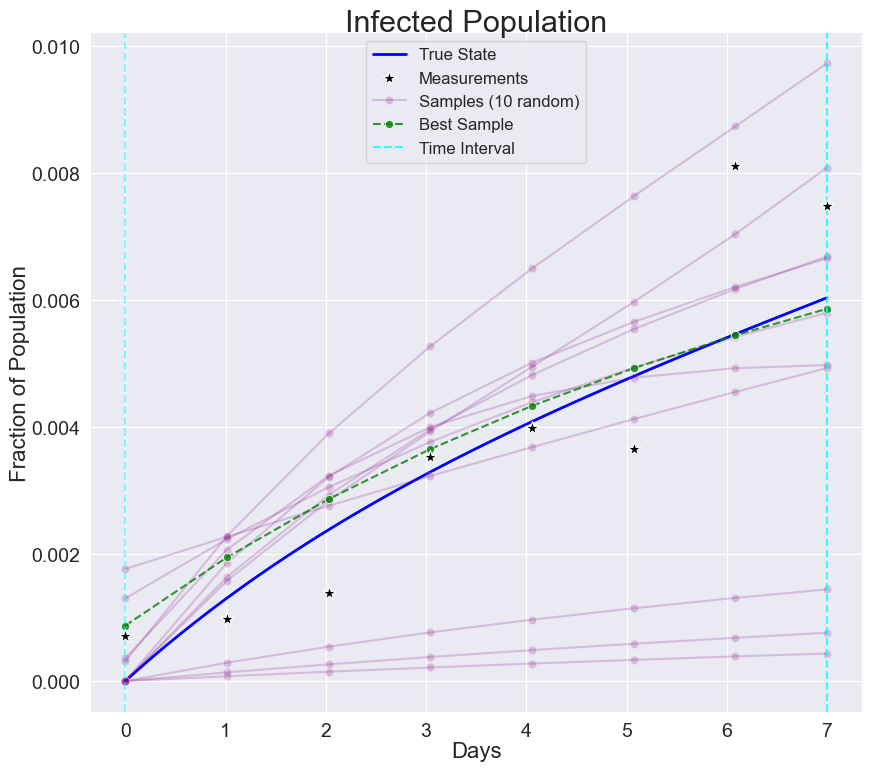

In [31]:
sr.plot_infected()

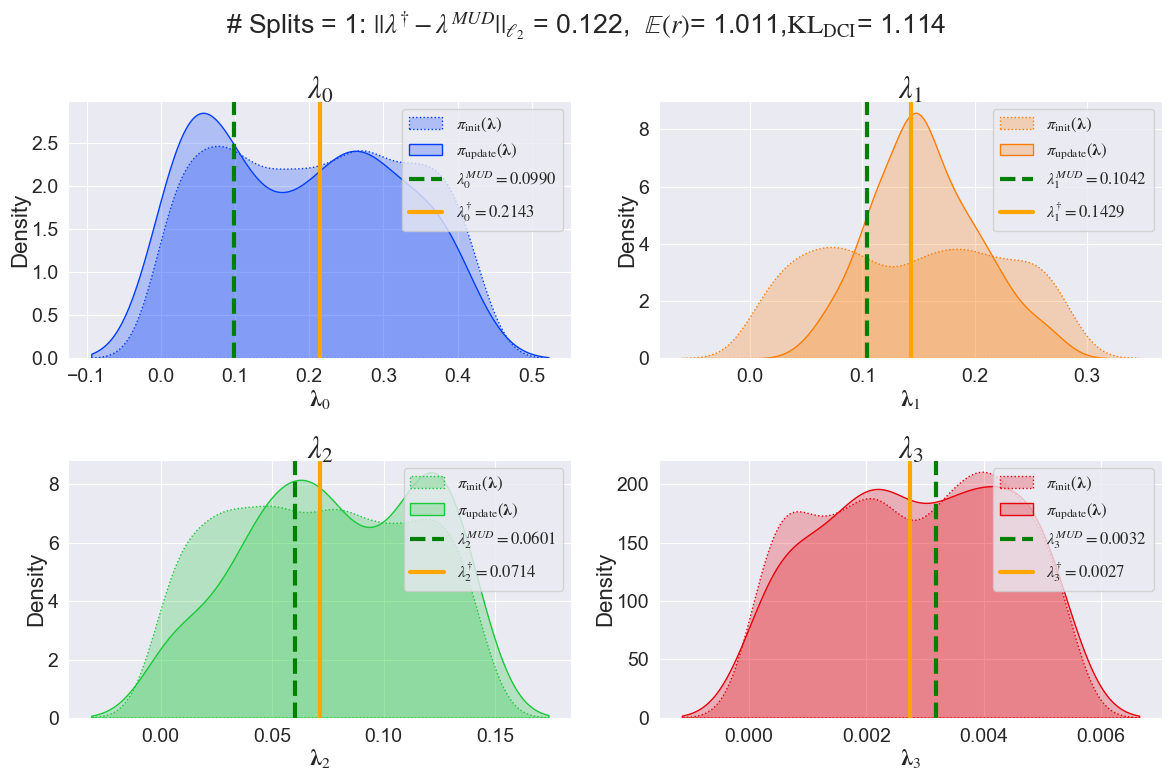

In [32]:
prob.probs[0].best.param_density_plots(lam_true=np.array(SEIRS_P1))

In [33]:
prob.probs[0]

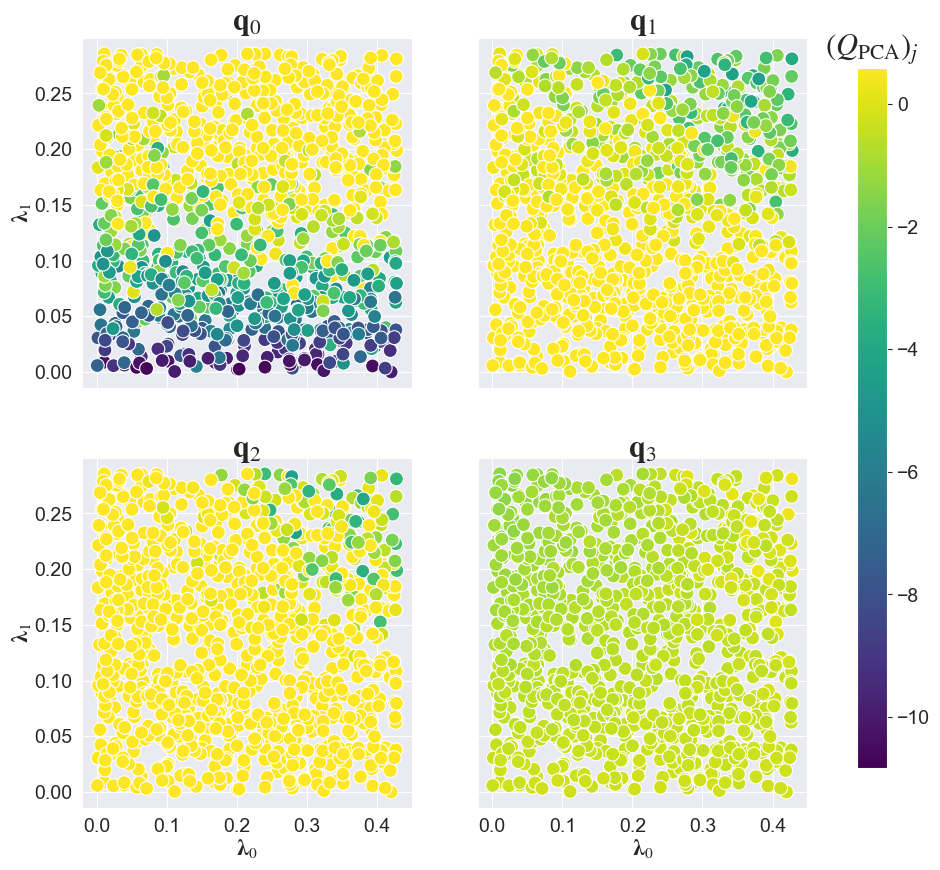

In [34]:
prob.probs[0].best.plot_qoi_over_params()

## Second Iteration

In [35]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=False,
)

Solving model sample set: |█████████▌          | ▂▄▆ 477/1000 [48%] in 0s (~0s, 

<Axes: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

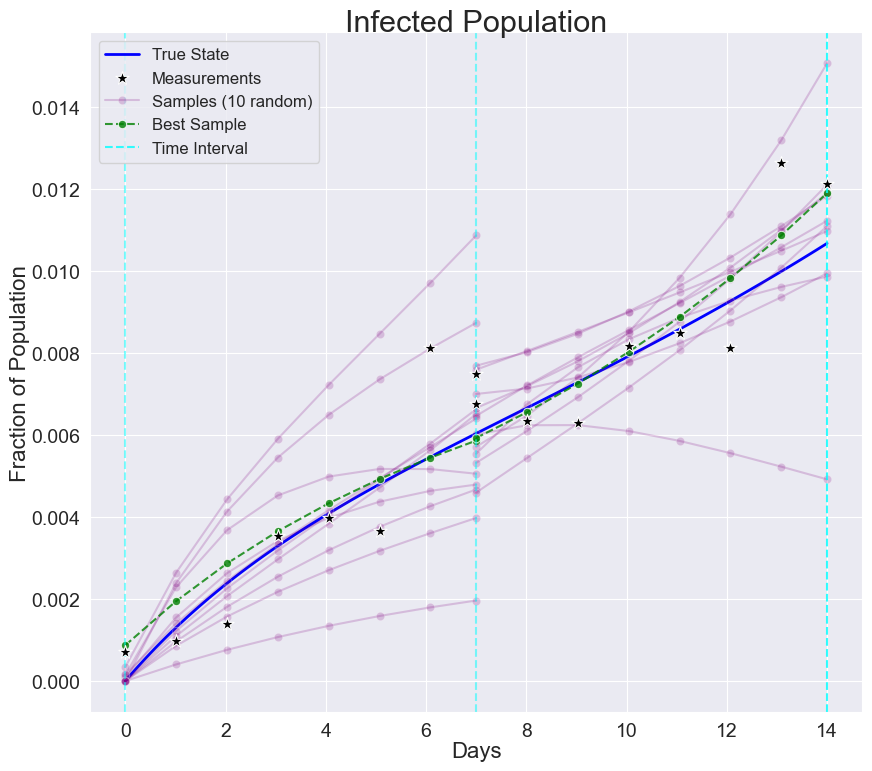

In [36]:
sr.plot_infected()

## Third Iteration

In [37]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=False,
)

<Axes: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

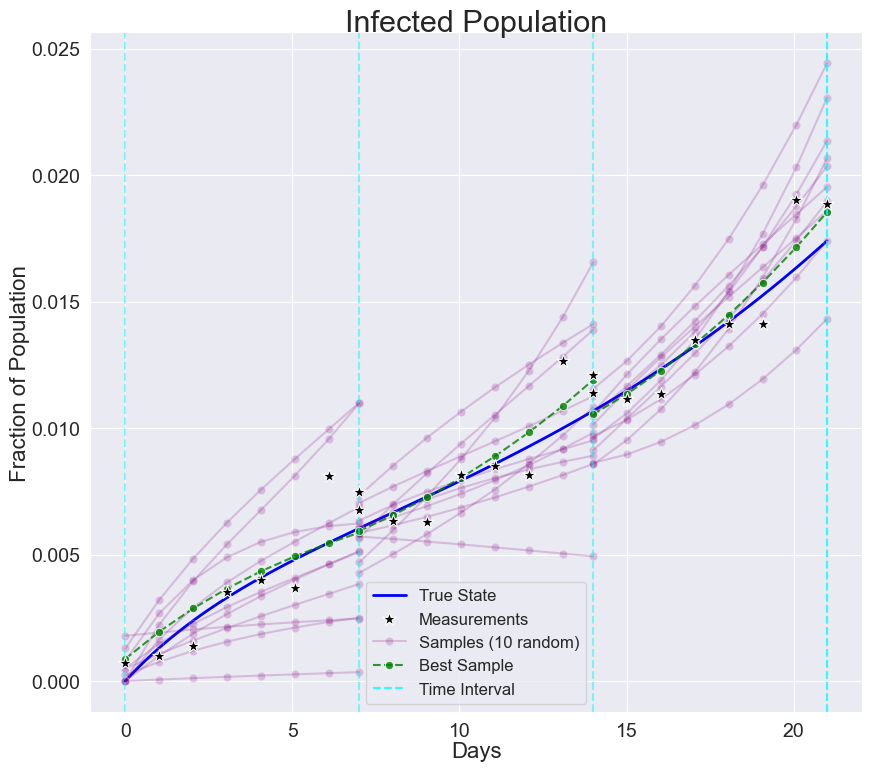

In [38]:
sr.plot_infected()

## Fourth Iteration

In [39]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=False,
)

<Axes: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

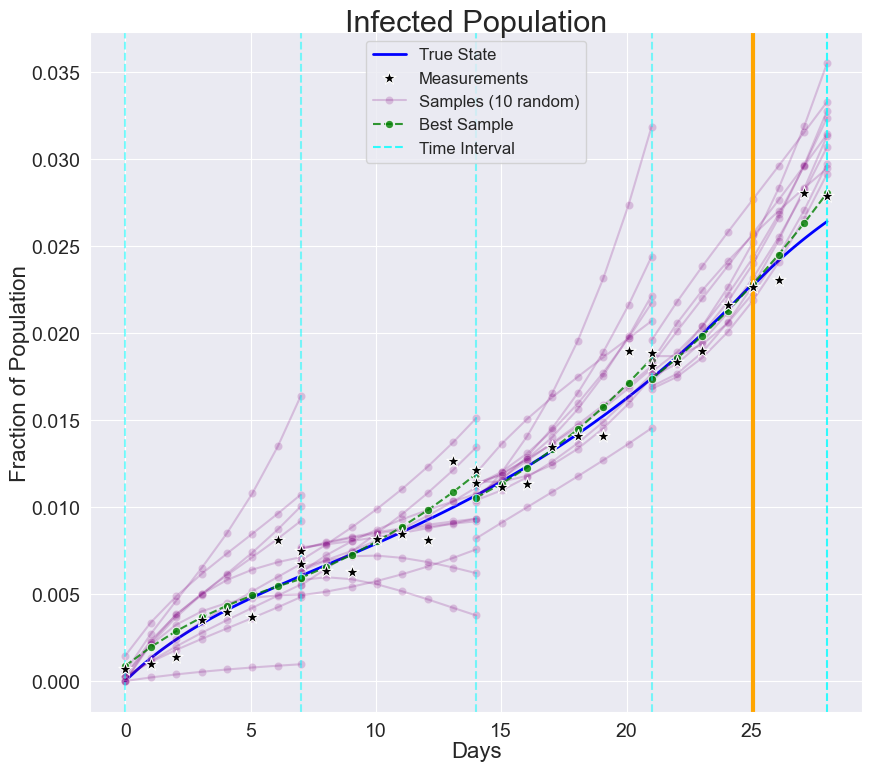

In [40]:
sr.plot_infected()

## Fifth Iteration

In [41]:
prob.solve(
    num_its=1,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=False,
    reset_samples=False,
)

Solving model sample set: |██                  | ▁▃▅ 102/1000 [10%] in 0s (~0s, 

<Axes: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

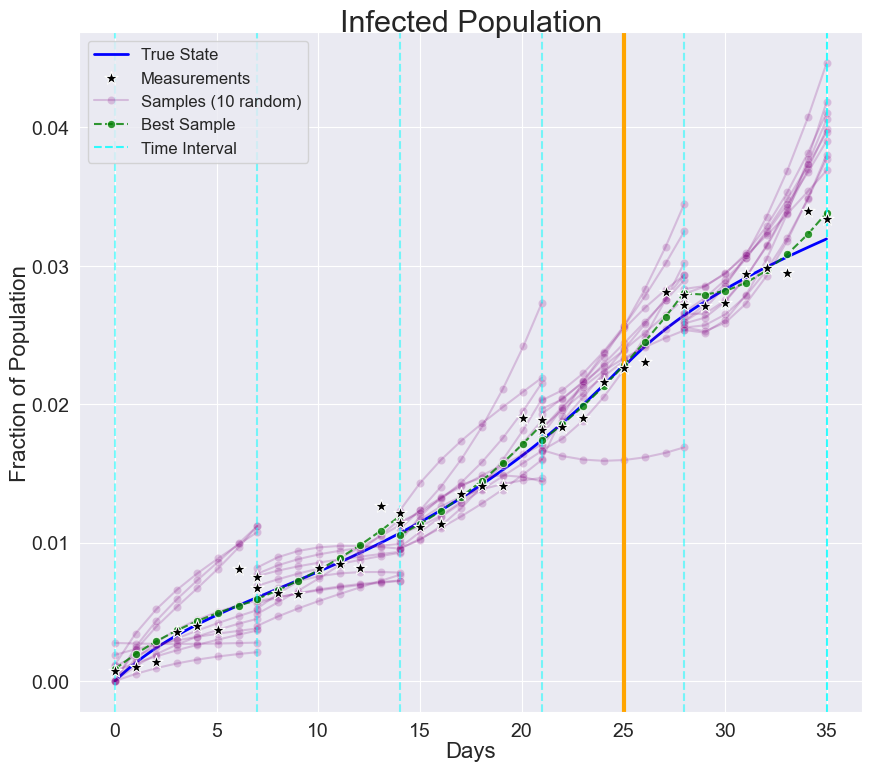

In [42]:
sr.plot_infected()

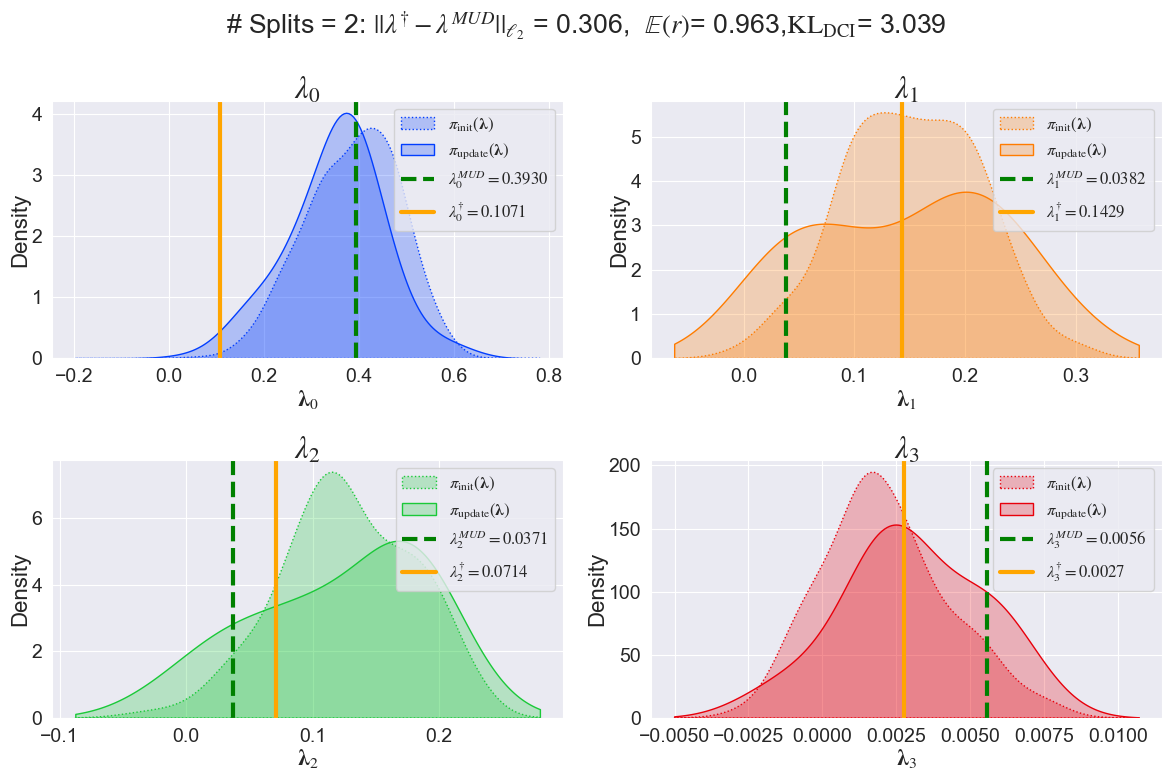

In [43]:
prob.probs[-1].best.param_density_plots(lam_true=np.array(SEIRS_P2))

# Full Simulation

In [7]:
# disable_log()
enable_log(level="INFO", file="test.log")
set_seed(2023)
sr = seirs.SEIRSModel(
    lam_true=SEIRS_P1,
    param_shifts=param_shifts,
    measurement_noise=SEIRS_NOISE,
    sample_ts=SEIRS_SAMPLE_TS,
    state_mins=SEIRS_STATE_MINS,
    state_maxs=SEIRS_STATE_MAXS,
)

In [8]:
importlib.reload(os)
prob2 = os.OnlineSequential(
    sr,
    time_step=7,
)
# disable_log()
# enable_log(level='DEBUG', filter='pydci.consistent_bayes.OnlineSequential')

In [9]:
prob2.solve(
    num_its=52,
    max_t=None,
    num_samples=1000,
    max_sample_size=1000,
    samples_inc=None,
    time_step=7,
    exp_thresh=0.2,
    kl_thresh=3.0,
    min_eff_sample_size=1.0,
    num_tries_per_it=2,
    sampling_args={
        "dist": "uniform",
        "scale": 1.0,
    },
    solver_args=dict(
        pca_range=[1, 2],
        split_range=[1, 2],
        all_data=True,
    ),
    make_plots=False,
    seed=2023,
    reset_model=True,
    reset_samples=True,
)

<Axes: title={'center': 'Infected Population'}, xlabel='Days', ylabel='Fraction of Population'>

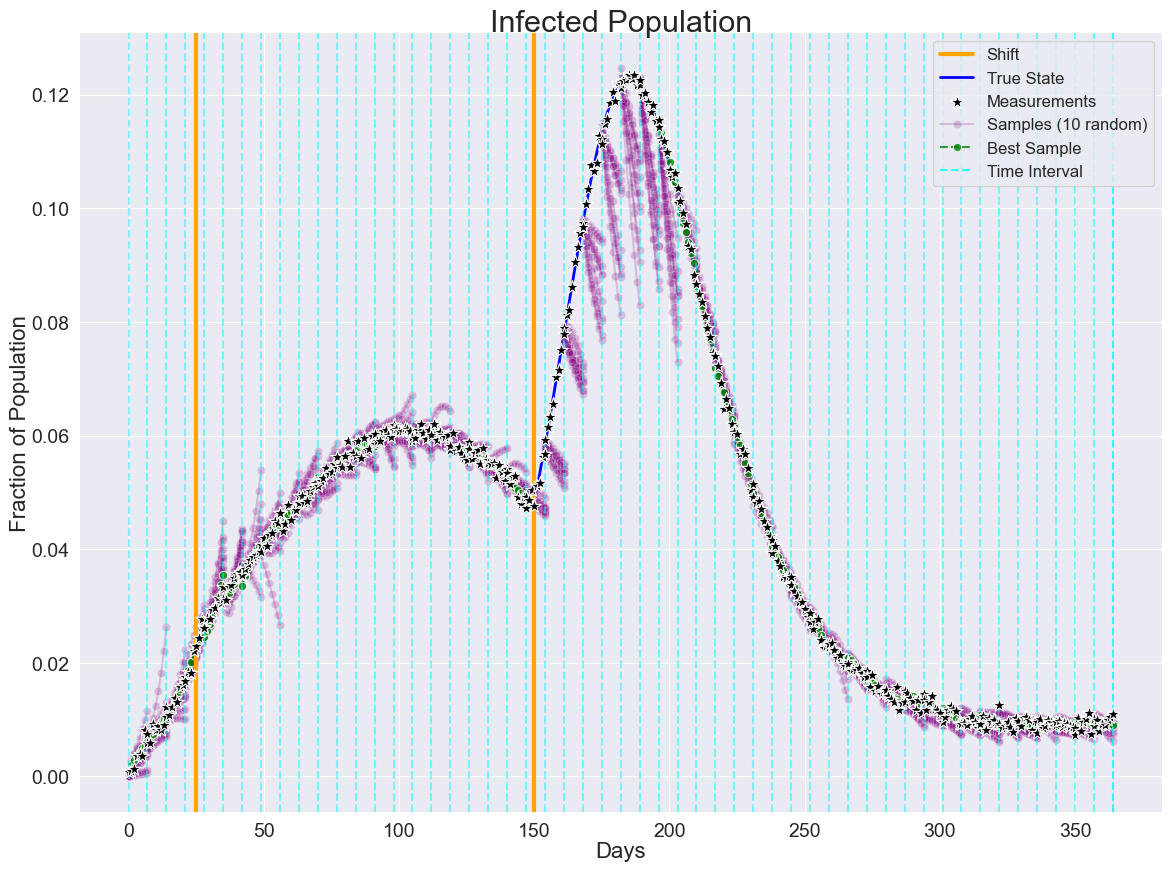

In [10]:
sr.plot_infected(figsize=(12,9))

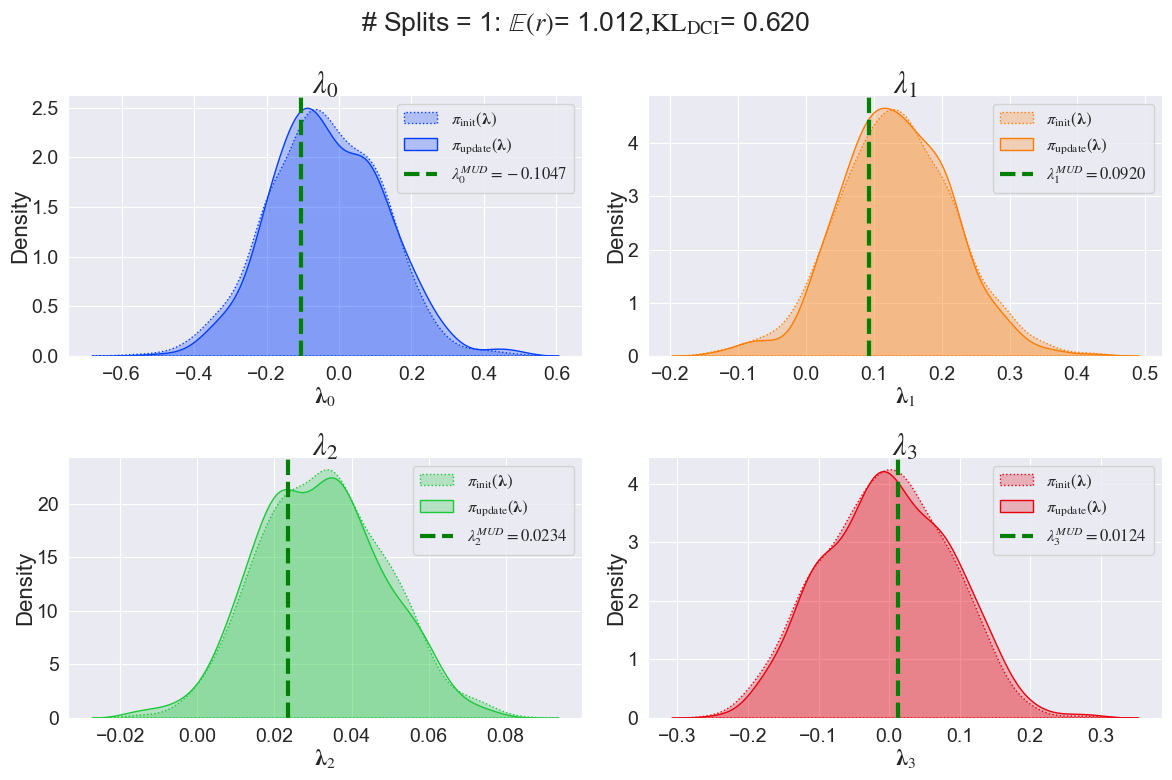

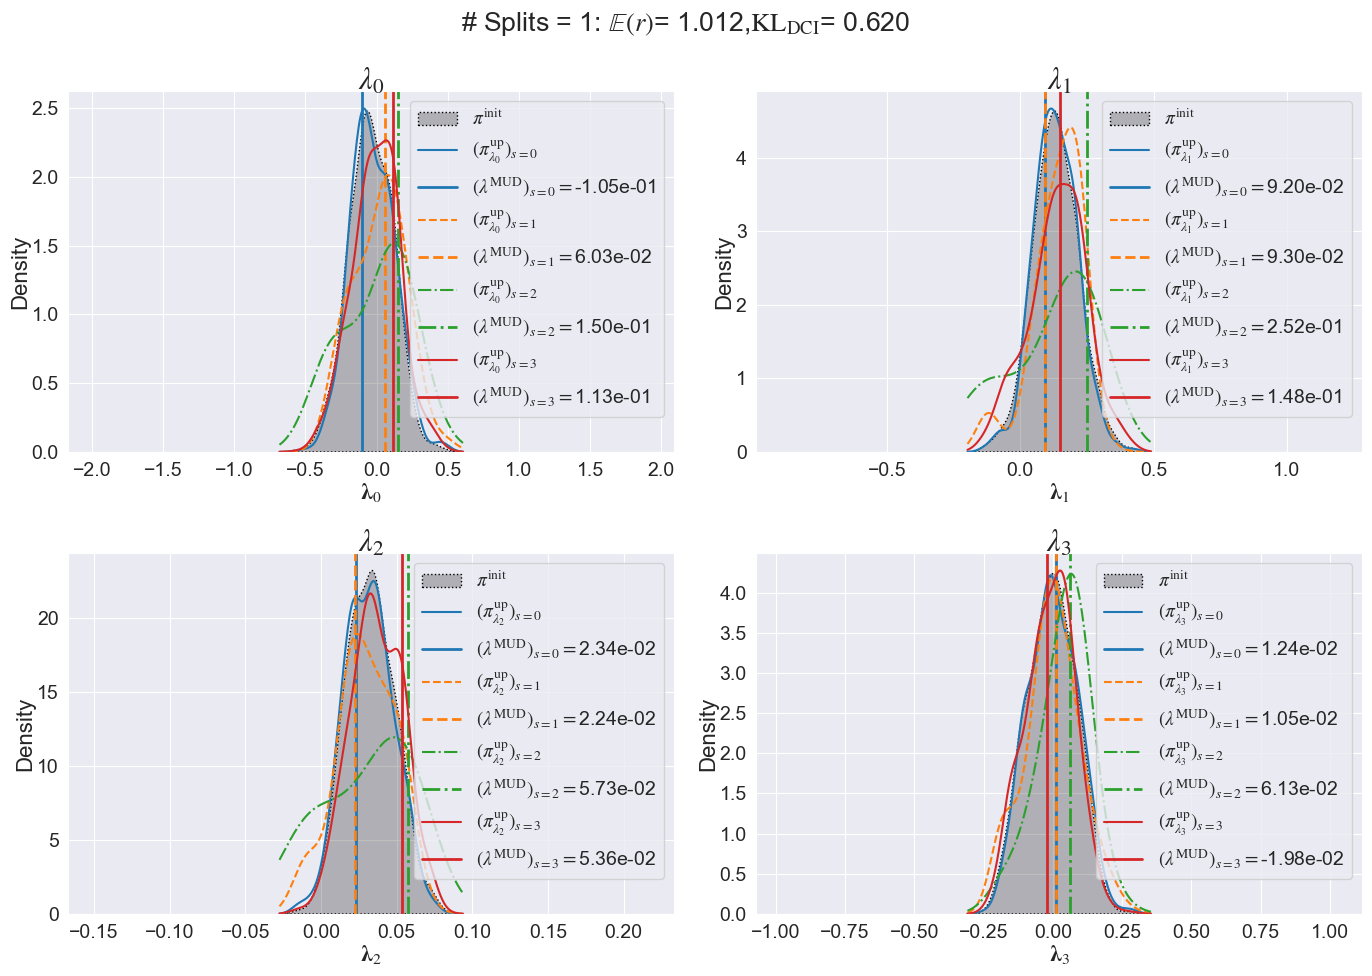

True

In [11]:
prob2.make_summary_plots()